In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')
from time import time
%matplotlib inline
import plotly
import datetime
import matplotlib.dates as mdates
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.subplots import make_subplots

In [2]:
import os
os.getcwd()
os.chdir("C:/Users/Lekhasree Uddanti/Desktop/SVMModel")

In [3]:
data1=pd.read_csv('GannavaramAirportData.csv')
data2=pd.read_csv('HyderabadAirportData.csv')
data3=pd.read_csv('DelhiAirportData.csv')
df = pd.concat([data1,data2,data3],axis=0)
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (272, 4)


,AirportName,TimeStamp,BarcodeData,ServiceUsed
0,Gannavaram,7/28/2020 2:39,8.660000e+12,Trolleys
1,Gannavaram,7/28/2020 4:39,4.680000e+12,Arrival Baggage Belt
2,Gannavaram,7/28/2020 6:39,2.900000e+12,Parking Stands
3,Gannavaram,7/28/2020 7:39,8.490000e+12,Boarding Gates
4,Gannavaram,7/28/2020 8:39,4.500000e+12,Parking Stands


In [4]:
df['TimeStamp']=pd.to_datetime(df['TimeStamp']) 
df['year'] = df['TimeStamp'].apply(lambda x: x.year)
df['month'] = df['TimeStamp'].apply(lambda x: x.month)
df['day'] = df['TimeStamp'].apply(lambda x: x.day)
df.sort_values('TimeStamp', inplace=True, ascending=True)

In [5]:
df1 = df.groupby(["AirportName","year","month","day","ServiceUsed"]).size().reset_index(name="Units")
df1

,AirportName,year,month,day,ServiceUsed,Units
0,Delhi,2020,7,28,Arrival Baggage Belt,3
1,Delhi,2020,7,28,Boarding Gates,4
2,Delhi,2020,7,28,Currency Exchange,4
3,Delhi,2020,7,28,Information Desk,1
4,Delhi,2020,7,28,Luggage Storage,2
...,...,...,...,...,...,...
84,Hyderabad,2020,7,28,Parking Stands,3
85,Hyderabad,2020,7,28,Trolleys,5
86,Hyderabad,2020,7,29,Arrival Baggage Belt,3
87,Hyderabad,2020,7,29,Information Desk,4


In [6]:
dt = pd.to_datetime(df1['day'].astype(str)+"/"+df1['month'].astype(str)+"/"+df1["year"].astype(str))
df2 = df1.iloc[: , [0, 4, 5]].copy() 
df2['TimeStamp'] = dt
df2

,AirportName,ServiceUsed,Units,TimeStamp
0,Delhi,Arrival Baggage Belt,3,2020-07-28
1,Delhi,Boarding Gates,4,2020-07-28
2,Delhi,Currency Exchange,4,2020-07-28
3,Delhi,Information Desk,1,2020-07-28
4,Delhi,Luggage Storage,2,2020-07-28
...,...,...,...,...
84,Hyderabad,Parking Stands,3,2020-07-28
85,Hyderabad,Trolleys,5,2020-07-28
86,Hyderabad,Arrival Baggage Belt,3,2020-07-29
87,Hyderabad,Information Desk,4,2020-07-29


Text(0.5, 1.0, 'Service Usage')

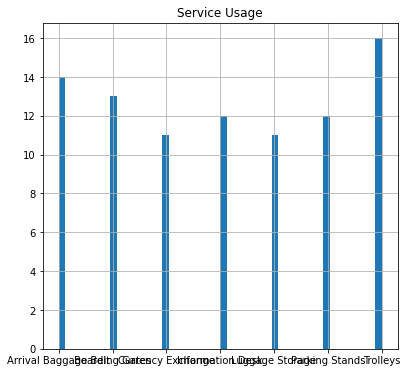

In [7]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df1['ServiceUsed'].hist(bins=50)
plt.title('Service Usage')

In [8]:
s1 = df2.loc[df2['ServiceUsed'] == 'Arrival Baggage Belt'] 
s2 = df2.loc[df2['ServiceUsed'] == 'Boarding Gates'] 
s3 = df2.loc[df2['ServiceUsed'] == 'Currency Exchange']
s4 = df2.loc[df2['ServiceUsed'] == 'Information Desk']
s5 = df2.loc[df2['ServiceUsed'] == 'Luggage Storage']
s6 = df2.loc[df2['ServiceUsed'] == 'Parking Stands']
s7 = df2.loc[df2['ServiceUsed'] == 'Trolleys']

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
df2['ServiceUsed']= label_encoder.fit_transform(df2['ServiceUsed']) 
df2['AirportName']= label_encoder.fit_transform(df2['AirportName'])
df2['TimeStamp'] = df2['TimeStamp'].map(mdates.date2num)

In [10]:
df2

,AirportName,ServiceUsed,Units,TimeStamp
0,0,0,3,737634.0
1,0,1,4,737634.0
2,0,2,4,737634.0
3,0,3,1,737634.0
4,0,4,2,737634.0
...,...,...,...,...
84,2,5,3,737634.0
85,2,6,5,737634.0
86,2,0,3,737635.0
87,2,3,4,737635.0


In [11]:
array = df2.values
x = array[:,[0,1,3]]
y = array[:,2]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=109) 

In [13]:
from sklearn import svm
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [14]:
y_pred=svr_rbf.predict(x_test)
y_pred

array([ 2.14468187,  2.21055211,  1.88798592,  2.45239159,  4.04214394,
        6.60016061,  2.82624059,  2.77117129,  2.34345061,  0.13418173,
        3.81991714,  1.5577182 ,  0.42144738, -3.36974206,  5.214636  ,
        3.06294731,  1.54918455,  7.74518249])

**S1: Arrival Baggage Belt**

In [15]:
label_encoder = preprocessing.LabelEncoder()
s1['ServiceUsed']= label_encoder.fit_transform(s1['ServiceUsed']) 
s1['AirportName']= label_encoder.fit_transform(s1['AirportName'])
s1['TimeStamp'] = s1['TimeStamp'].map(mdates.date2num)
array = s1.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=109) 
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps1 = svr_rbf.predict(x)
ps1

array([3.09741153, 3.90035552, 3.09978535, 1.45480485, 3.90022317,
       3.10001893, 3.89944387, 3.10001878, 1.45912   , 3.10006819,
       2.83740031, 2.83740031, 3.9000849 , 4.47800952])

In [16]:
len1 = sum(ps1)
len1

44.16414523009305

**S2: Boarding Gates**

In [17]:
#label_encoder = preprocessing.LabelEncoder()
s2['ServiceUsed']= label_encoder.fit_transform(s2['ServiceUsed']) 
s2['AirportName']= label_encoder.fit_transform(s2['AirportName'])
s2['TimeStamp'] = s2['TimeStamp'].map(mdates.date2num)
array = s2.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=109) 
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps2 = svr_rbf.predict(x)
ps2

array([3.89992097, 3.1003742 , 2.89960623, 2.89962544, 1.0998502 ,
       3.10058664, 3.89999381, 3.62398603, 2.09960477, 1.16565413,
       1.7913397 , 1.1004385 , 2.21954898])

In [18]:
len2 = sum(ps2)
len2

32.90052960512966

**S3: Currency Exchange**

In [19]:
#label_encoder = preprocessing.LabelEncoder()
s3['ServiceUsed']= label_encoder.fit_transform(s3['ServiceUsed']) 
s3['AirportName']= label_encoder.fit_transform(s3['AirportName'])
s3['TimeStamp'] = s3['TimeStamp'].map(mdates.date2num)
array = s3.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=109) 
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps3 = svr_rbf.predict(x)
ps3

array([3.90007857, 2.1001867 , 1.35937331, 1.10007646, 1.71001101,
       2.1004365 , 3.89962734, 5.26228258, 1.10004884, 1.09954419,
       0.01461517])

In [20]:
len3 = sum(ps3)
len3

23.646280675656556

**S4: Information Desk**

In [21]:
s4['ServiceUsed']= label_encoder.fit_transform(s4['ServiceUsed']) 
s4['AirportName']= label_encoder.fit_transform(s4['AirportName'])
s4['TimeStamp'] = s4['TimeStamp'].map(mdates.date2num)
array = s4.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=109) 
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps4 = svr_rbf.predict(x)
ps4

array([1.10025896, 2.9001362 , 3.0562756 , 1.90021872, 3.90018943,
       3.09932467, 3.10013007, 1.10006625, 1.70619625, 1.70619625,
       2.1002171 , 3.89946025])

In [22]:
len4 = sum(ps4)
len4

29.56866973073024

**S5: Luggage Storage**

In [23]:
s5['ServiceUsed']= label_encoder.fit_transform(s5['ServiceUsed']) 
s5['AirportName']= label_encoder.fit_transform(s5['AirportName'])
s5['TimeStamp'] = s5['TimeStamp'].map(mdates.date2num)
array = s5.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=109) 
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps5 = svr_rbf.predict(x)
ps5

array([2.10034142, 2.89966913, 3.05360952, 2.09966194, 1.28502871,
       2.10029936, 2.89949094, 2.82904586, 2.10030032, 2.10001968,
       1.90021796])

In [24]:
len5 = sum(ps5)
len5

25.367684845071068

**S6: Parking Stands**

In [25]:
s6['ServiceUsed']= label_encoder.fit_transform(s6['ServiceUsed']) 
s6['AirportName']= label_encoder.fit_transform(s6['AirportName'])
s6['TimeStamp'] = s6['TimeStamp'].map(mdates.date2num)
array = s6.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=109) 
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps6 = svr_rbf.predict(x)
ps6

array([ 4.10037694,  6.8996837 ,  6.48266012,  3.10028586,  7.89958346,
        5.10025329,  4.89961481,  6.9002498 , -2.57987107, -2.57987107,
        1.89987512,  3.10008012])

In [26]:
len6 = sum(ps6)
len6

45.22292109797158

**S7: Trolleys**

In [27]:
s7['ServiceUsed']= label_encoder.fit_transform(s7['ServiceUsed']) 
s7['AirportName']= label_encoder.fit_transform(s7['AirportName'])
s7['TimeStamp'] = s7['TimeStamp'].map(mdates.date2num)
array = s7.values
x = array[:,[0,1,3]]
y = array[:,2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=109) 
svr_rbf = svm.SVR(kernel='rbf',C= 1e3, gamma=0.1, epsilon=.1) 
svr_rbf.fit(x_train, y_train)
ps7 = svr_rbf.predict(x)
ps7

array([2.89968737, 2.10033477, 2.89958157, 4.10055219, 5.90009187,
       1.09962126, 1.09970883, 3.56616197, 1.55174649, 1.10020782,
       1.70631189, 3.10013671, 2.89981594, 7.89970965, 4.90055529,
       2.17664188])

In [28]:
len7 = sum(ps7)
len7

49.00086548399213

In [29]:
label = ['Arrival Baggage Belt','Boarding Gates','Currency Exchange','Information Desk','Luggage Storage','Parking Stands','Trolleys']
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]], subplot_titles=['Bar Chart', 'Pie Chart'])
trace1=go.Bar(
    x=label,
    y=[len1,len2,len3,len4,len5,len6,len7],
    name="",
    marker = {'color' : ['cyan','darkviolet','red','green','blue','orange'] }
    )

trace2=go.Pie(values=[len1,len2,len3,len4,len5,len6,len7],
labels=label,
name="")
fig.add_trace(trace1,row=1, col=1)
fig.add_trace(trace2,row=1, col=2)

fig.update_layout(title='Overall Service Consumption', xaxis={'title':'Service name'},
    yaxis={'title':'Units of Comsumption'})
plotly.offline.plot(fig, filename='C:\\xampp\\htdocs\\Project\\overall.html',validate=False)


'C:\\xampp\\htdocs\\Project\\overall.html'